# Task 6.4: Supervised Machine Learning: Regression

# Table of content:

## 1 Import libraries and file
## 2 Data cleaning
## 3 Preparing data for the regression analysis
## 4 Regression analysis

### 1 Import libraries and file

In [15]:
# Import scikit-learn and other libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv(r"C:\Users\azikb\Downloads\Bike Sales in Europe and USA\Prepared Data\Sales_clean.csv")

In [37]:
# Enable the option to display the graphs.

%matplotlib inline

### 2 Data cleaning

In [21]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [39]:
df.shape

(112036, 18)

In [41]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [43]:
df.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [25]:
df.isnull().sum()
# There is no empty data

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [31]:
dups = df.duplicated()

In [33]:
dups

0         False
1         False
2         False
3         False
4         False
          ...  
112031    False
112032    False
112033    False
112034    False
112035    False
Length: 112036, dtype: bool

#### Checking for the extreme values

C:\Users\azikb\AppData\Local\Temp\ipykernel_13432\2322271965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Revenue'], bins=25) # Shows extreme values
C:\Users\azikb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Revenue', ylabel='Density'>

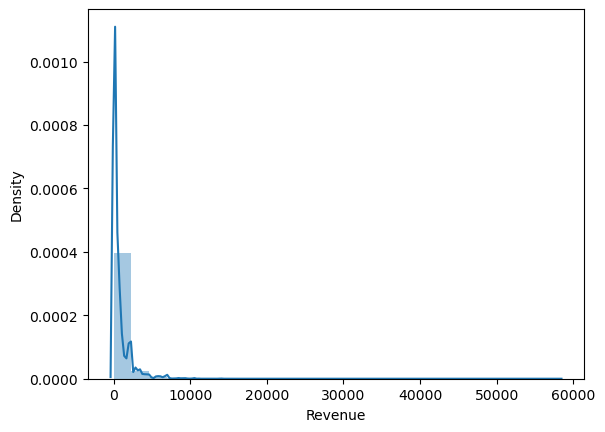

In [52]:
sns.distplot(df['Revenue'], bins=25) # Shows extreme values

In [64]:
df['Revenue'].mean()

757.1385269020672

In [68]:
df['Revenue'].max()

58074

In [70]:
df['Revenue'].min()

2

#### From my wiew the best way to show outliers are use the boxplot. Here we see all extreme values clearly

<Axes: ylabel='Revenue'>

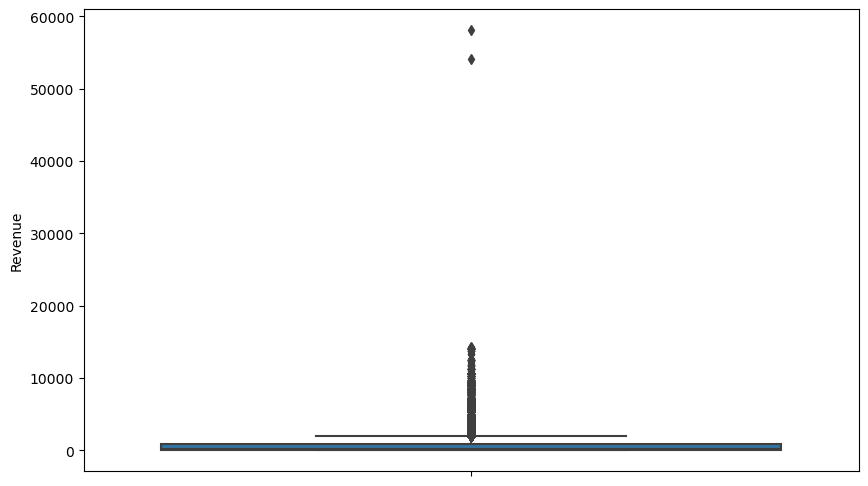

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Revenue', data=df)

In [82]:
df[df['Revenue']>30000]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
111072,24/07/2013,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069
111073,24/07/2015,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074


## I decided to delete two outliers. The data set will be analysed without them

In [124]:
# Let's delete extreme values. I decided to clean extreme values in 'Cost' columns
df2 = df[df['Revenue'] <= 30000]

In [126]:
df2.shape

(112034, 18)

### 3 Preparing data for regression analysis

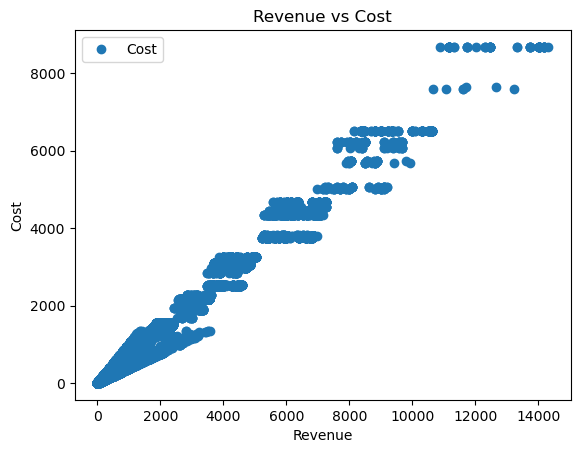

In [161]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'Revenue', y='Cost', style ='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Revenue vs Cost')  
plt.xlabel('Revenue')  
plt.ylabel('Cost')  
plt.show()

In [163]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df2['Revenue'].values.reshape(-1,1)
y = df2['Cost'].values.reshape(-1,1)

In [165]:
X

array([[ 950],
       [ 950],
       [2401],
       ...,
       [1183],
       [1260],
       [1207]], dtype=int64)

In [167]:
y

array([[ 360],
       [ 360],
       [1035],
       ...,
       [ 528],
       [ 576],
       [ 552]], dtype=int64)

In [169]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4 Regression analysis

In [178]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [180]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [182]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

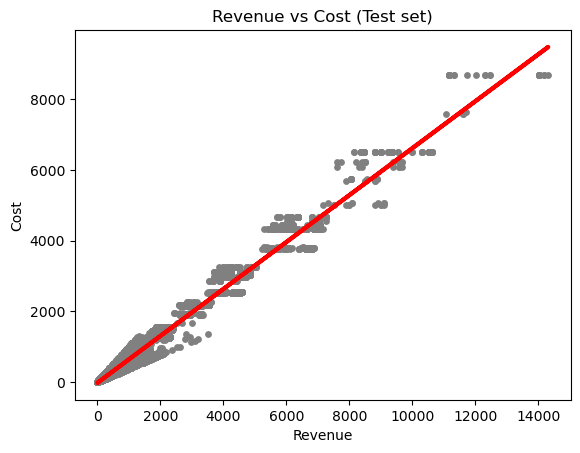

In [184]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Revenue vs Cost (Test set)')
plot_test.xlabel('Revenue')
plot_test.ylabel('Cost')
plot_test.show()

### Our red line- prediction line shows how the Revenue increases when cost increases. But it still does not cover all points. However the line has a positive correlation

In [186]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [188]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.66537671]]
Mean squared error:  17762.386526305218
R2 score:  0.9774426083106207


### Our slope is positive 0.66537671, which indicates a direct relationship between the independent and dependent variables. This means that as the independent variable increases, the dependent variable also increases.

### The MSE is 17762. It means that the regression is not the best model to represent this data and can not accuraly predict the influence of the Cost to Revenue. To check if these values are big or small, we need to check the RANGE. 

In [195]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,13,-9.782787
1,48,32.135946
2,1260,1302.340078
3,19,-13.109670
4,4342,4538.066999
5,12,-17.101931
6,344,311.594162
7,15,-7.121280
8,494,843.230150
9,2166,2140.049351


### As we can see some actual and predicted data are very absurd. I can not interpret them. Some data shows small, middle and hight differences...

### Let's see our range. 

In [207]:
# Get range of a column
column_range = df['Revenue'].max() - df['Revenue'].min()
column_range

58072

### The relation between MSE (17762) and Range (58072) is not very big.

### R² score of 0.9774426083106207: Indicates that the model explains approximately 97.74% of the variance in the dependent variable, which signifies an excellent fit.

### In summary, based on the provided metrics, the prediction model demonstrates strong predictive power with a high R² score and a positive slope indicating a direct relationship. The relatively high MSE suggests room for improvement in reducing prediction errors, but overall, the model is effective in explaining and predicting the dependent variable (Revenue) based on the independent variable (Cost).

## Let's check how the model fit to training set

In [215]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [218]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [220]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.66537671]]
Mean squared error:  17105.473117479214
R2 score:  0.9769902606957533


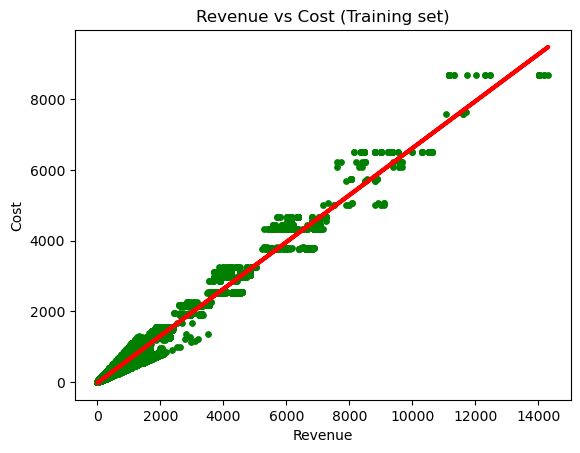

In [228]:
# Create a plot that shows the regression line from the model on the Training set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Revenue vs Cost (Training set)')
plot_test.xlabel('Revenue')
plot_test.ylabel('Cost')
plot_test.show()